<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 2. Connect to the Database


**Install the needed libraries**


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [2]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
df

,COUNT(*)
0,65437


#### Demo 2: List All Tables


In [3]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [4]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [ ]:
query = """
SELECT CompTotal FROM main
WHERE CompTotal IS NOT NULL
"""
compt = pd.read_sql(query, conn)
Q1 = compt['CompTotal'].quantile(0.25)
Q3 = compt['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
compt_outlier = compt[(compt['CompTotal'] >= lower_bound) & (compt['CompTotal'] <= upper_bound)]
compt_outlier

,CompTotal
1,28000.0
2,85000.0
3,50000.0
4,110000.0
5,126420.0
...,...
33735,36000.0
33736,40000.0
33737,61000.0
33738,58000.0


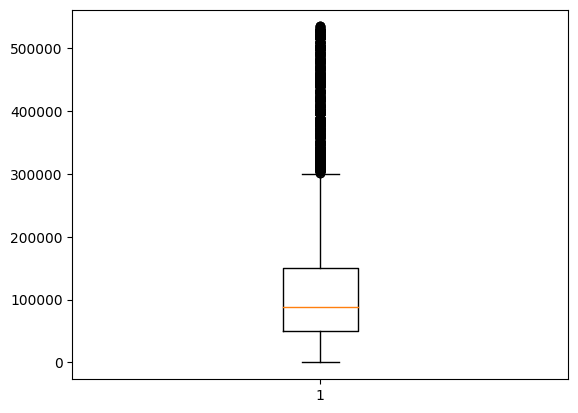

In [19]:
plt.boxplot(compt_outlier['CompTotal'])
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [25]:
query = """
SELECT 
    CASE 
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = 'Under 18 years old' THEN 16
        WHEN Age = '65 years or older' THEN 66
        WHEN Age = 'Prefer not to say' THEN 25
    END AS AgeNum
FROM main
WHERE Age IS NOT NULL;
"""
age = pd.read_sql(query, conn)
age

,AgeNum
0,16
1,40
2,50
3,21
4,21
...,...
65432,21
65433,30
65434,30
65435,21


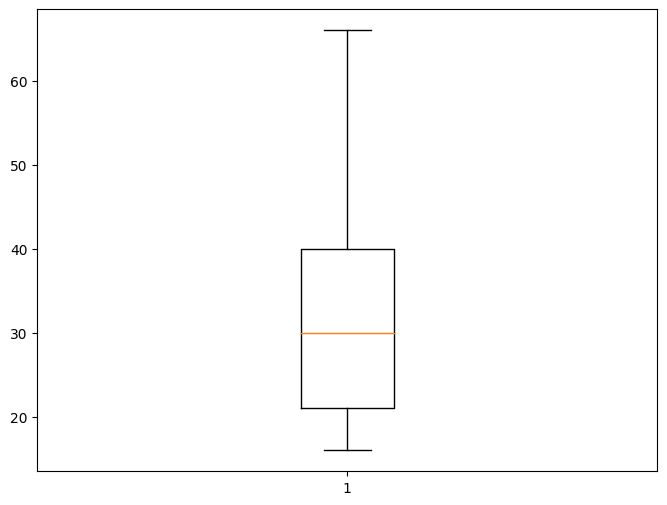

In [30]:
plt.figure(figsize=(8,6))
plt.boxplot(age['AgeNum'])
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [51]:
query = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL 
"""
comp = pd.read_sql(query, conn)
comp['Age'].value_counts()

Age
25-34 years old       14657
35-44 years old        9352
18-24 years old        4636
45-54 years old        3516
55-64 years old        1279
65 years or older       196
Under 18 years old       90
Prefer not to say        14
Name: count, dtype: int64

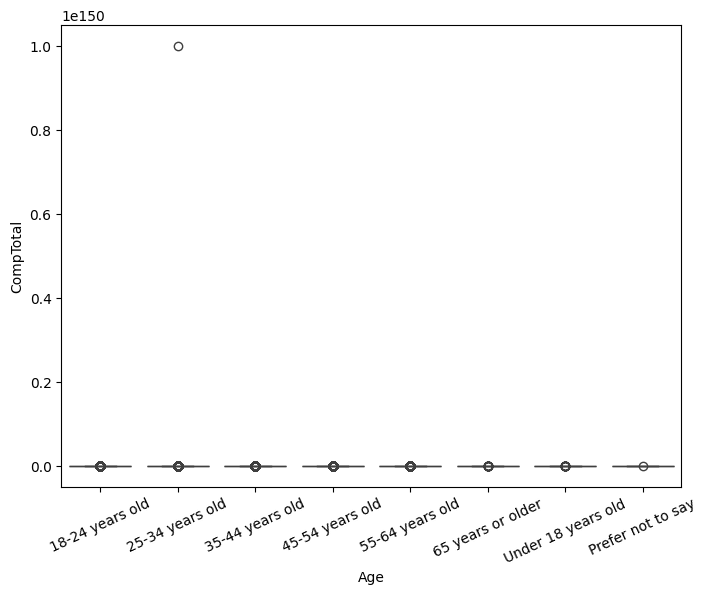

In [50]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.boxplot(data=comp, y='CompTotal', x='Age')
plt.xticks(rotation=25)
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [ ]:
query = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
comp_job = pd.read_sql(query, conn)
top5 = comp_job['JobSatPoints_6'].value_counts().head(5).index
comp_job_clean = comp_job[comp_job['JobSatPoints_6'].isin(top5)]
comp_job_clean

,CompTotal,JobSatPoints_6
1,85000.0,0.0
2,110000.0,20.0
3,126420.0,30.0
4,195000.0,30.0
6,170000.0,20.0
...,...,...
22471,90000.0,15.0
22473,40000.0,20.0
22475,81600.0,20.0
22476,500000.0,0.0


In [64]:
Q1 = comp_job_clean['CompTotal'].quantile(0.25)
Q3 = comp_job_clean['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
compt_outlier = comp_job_clean[(comp_job_clean['CompTotal'] >= lower_bound) & (comp_job_clean['CompTotal'] <= upper_bound)]
compt_outlier

,CompTotal,JobSatPoints_6
1,85000.0,0.0
2,110000.0,20.0
3,126420.0,30.0
4,195000.0,30.0
6,170000.0,20.0
...,...,...
22471,90000.0,15.0
22473,40000.0,20.0
22475,81600.0,20.0
22476,500000.0,0.0


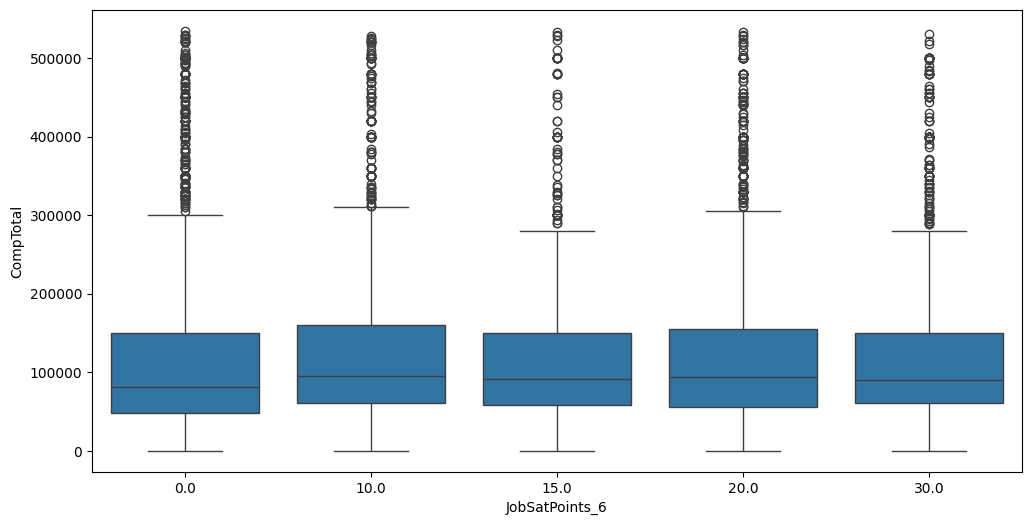

In [66]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=compt_outlier, x='JobSatPoints_6', y='CompTotal')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [82]:
query = """
SELECT JobSat, Employment
FROM main
WHERE JobSat IS NOT NULL AND Employment IS NOT NULL"""
emp = pd.read_sql(query, conn)
top5 = emp['Employment'].value_counts().head().index
emp_top5 = emp[emp['Employment'].isin(top5)]
emp_top5

,JobSat,Employment
0,8.0,"Employed, full-time"
1,8.0,"Employed, full-time"
2,5.0,"Employed, full-time"
3,10.0,"Employed, full-time"
4,6.0,"Employed, full-time"
...,...,...
29121,8.0,"Employed, full-time"
29122,5.0,"Employed, full-time"
29123,8.0,"Employed, full-time"
29124,8.0,"Employed, full-time;Independent contractor, fr..."


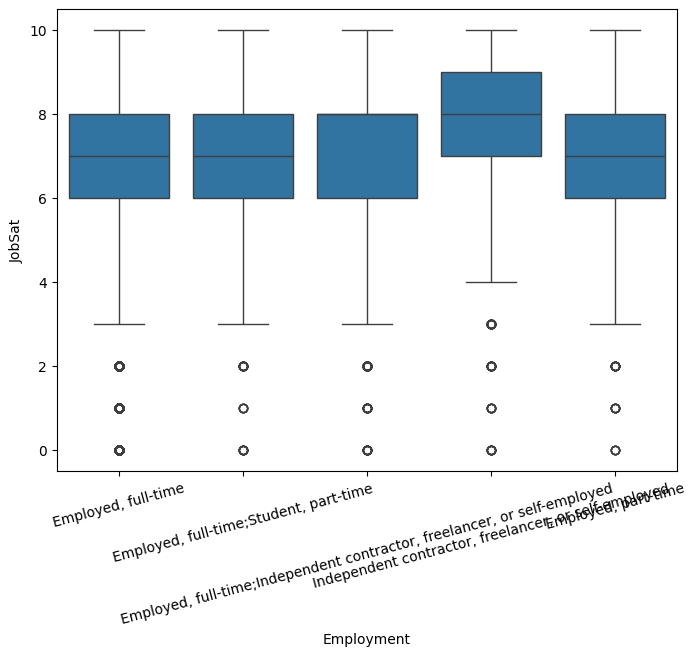

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(data=emp_top5, x='Employment', y='JobSat')
plt.xticks(rotation=15)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [95]:
query = """
SELECT CompTotal, Country
FROM main
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL
"""
cmp_cnt = pd.read_sql(query, conn)

Q1 = cmp_cnt['CompTotal'].quantile(0.25)
Q3 = cmp_cnt['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_cleaned = cmp_cnt[(cmp_cnt['CompTotal'] >= lower) & (cmp_cnt['CompTotal'] <= upper)]
top_5 = df_cleaned['Country'].value_counts().head().index
cmp_cleaned = df_cleaned[df_cleaned['Country'].isin(top_5)]
cmp_cleaned

,CompTotal,Country
3,50000.0,France
4,110000.0,United States of America
5,126420.0,United Kingdom of Great Britain and Northern I...
6,95000.0,United Kingdom of Great Britain and Northern I...
7,195000.0,United States of America
...,...,...
33726,77700.0,France
33728,24000.0,Germany
33730,200000.0,United Kingdom of Great Britain and Northern I...
33736,40000.0,France


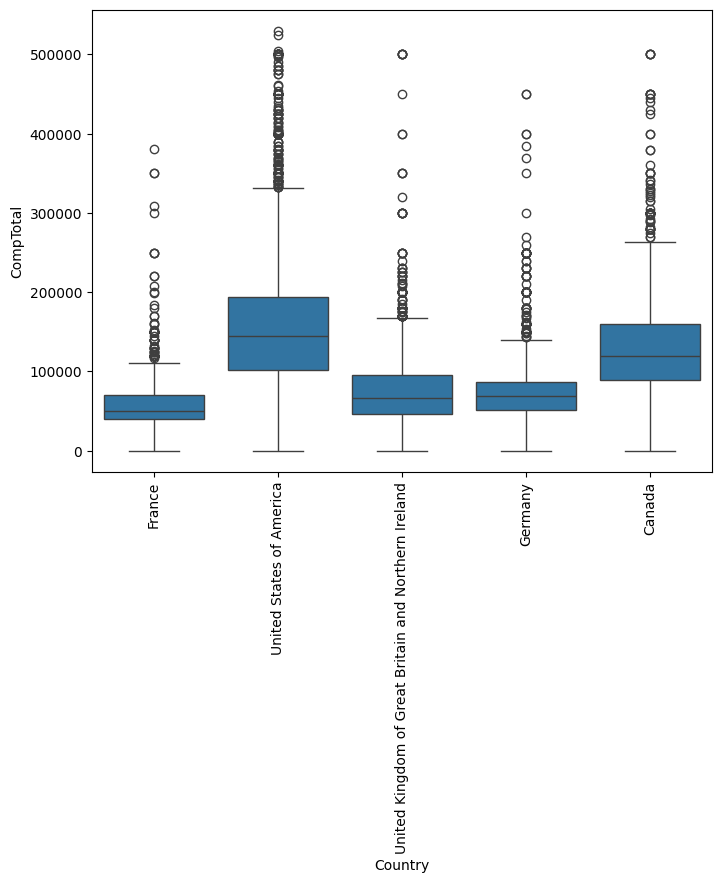

In [97]:
plt.figure(figsize=(8,6))
sns.boxplot(data=cmp_cleaned, x='Country', y='CompTotal')
plt.xticks(rotation=90)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [99]:
query = """
SELECT CompTotal, Employment
FROM main
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
comp_emp = pd.read_sql(query, conn)
Q1 = comp_emp['CompTotal'].quantile(0.25)
Q3 = comp_emp['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

comp_emp_clean = comp_emp[(comp_emp['CompTotal'] >= lower) & (comp_emp['CompTotal'] <= upper)]

top5_emp = comp_emp_clean['Employment'].value_counts().head(5).index
comp_emp_top5 = comp_emp_clean[comp_emp_clean['Employment'].isin(top5_emp)]
comp_emp_top5

,CompTotal,Employment
1,28000.0,"Employed, full-time"
2,85000.0,"Employed, full-time"
3,50000.0,"Independent contractor, freelancer, or self-em..."
4,110000.0,"Employed, full-time;Student, part-time"
5,126420.0,"Employed, full-time"
...,...,...
33735,36000.0,"Employed, full-time;Independent contractor, fr..."
33736,40000.0,"Employed, full-time"
33737,61000.0,"Employed, full-time"
33738,58000.0,"Employed, full-time"


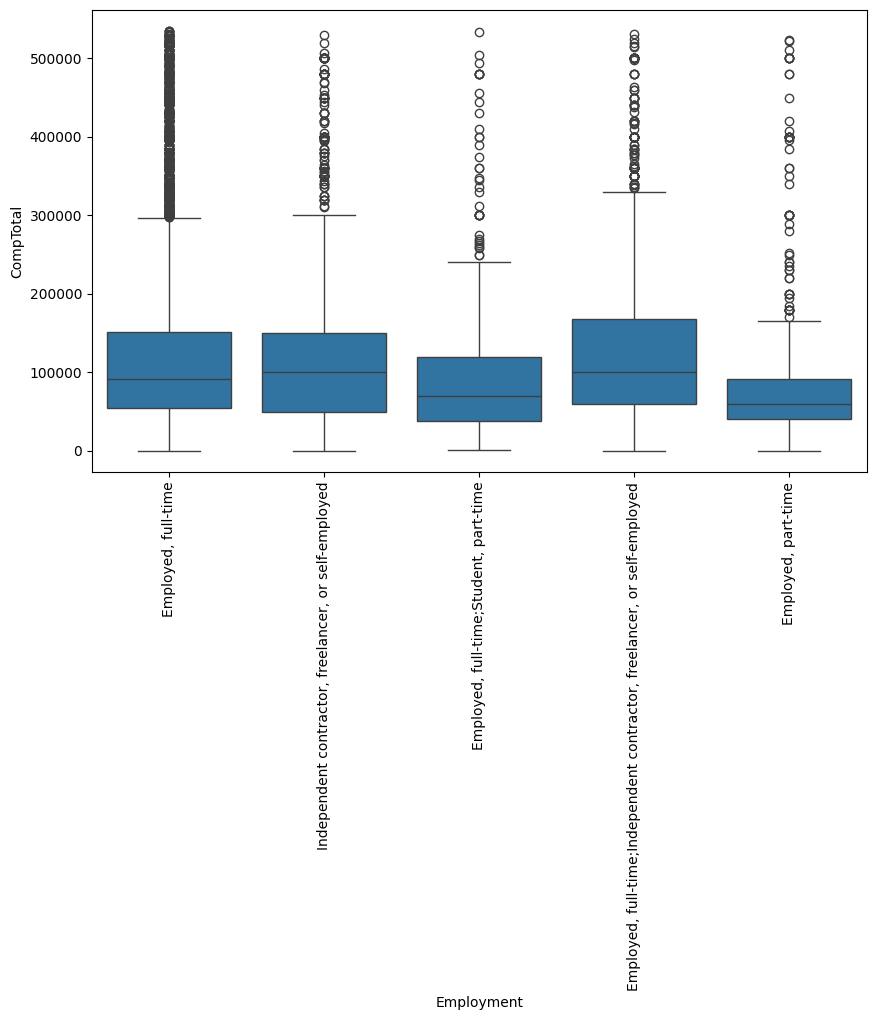

In [103]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Employment", y="CompTotal", data=comp_emp_top5)
plt.xticks(rotation=90)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [113]:
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"""
year_job = pd.read_sql(query, conn)
year_job

,YearsCodePro,JobSatPoints_6
0,17,0.0
1,12,30.0
2,27,0.0
3,10,60.0
4,Less than 1 year,100.0
...,...,...
28614,2,0.0
28615,17,0.0
28616,2,60.0
28617,7,0.0


In [117]:
def get_year(year):
    if year == 'Less than 1 year':
        return 0
    elif year == 'More than 50 years':
        return 51
    else:
        try:
            return int(year)
        except:
            return None
year_job['YearsCodePro'] = year_job['YearsCodePro'].apply(get_year)
t_5 = year_job['YearsCodePro'].value_counts().head().index
df = year_job[year_job['YearsCodePro'].isin(t_5)]
df

,YearsCodePro,JobSatPoints_6
3,10,60.0
16,4,5.0
18,4,0.0
21,2,100.0
23,5,0.0
...,...,...
28611,2,50.0
28613,2,20.0
28614,2,0.0
28616,2,60.0


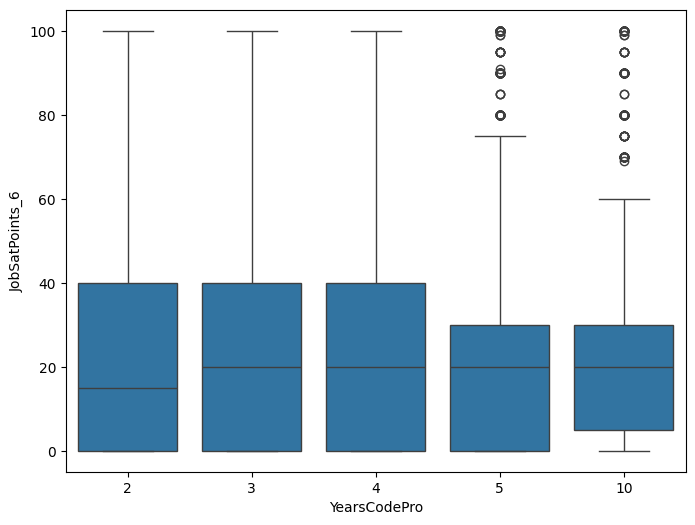

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='YearsCodePro', y='JobSatPoints_6')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [119]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
